# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | suva
Processing Record 3 of Set 1 | port macquarie
Processing Record 4 of Set 1 | yeppoon city centre
City not found. Skipping...
Processing Record 5 of Set 1 | mainvilliers
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | oban
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | lautoka
Processing Record 20 of Set 1 | xilin hot
Processing Record 21 of Set 1 | olonkinbyen

Processing Record 38 of Set 4 | malaga
Processing Record 39 of Set 4 | buka
Processing Record 40 of Set 4 | vicuna
Processing Record 41 of Set 4 | constantia
Processing Record 42 of Set 4 | kisesa
Processing Record 43 of Set 4 | minas de marcona
Processing Record 44 of Set 4 | sinabang
Processing Record 45 of Set 4 | cholpon-ata
Processing Record 46 of Set 4 | nadi
Processing Record 47 of Set 4 | skovorodino
Processing Record 48 of Set 4 | mantua
Processing Record 49 of Set 4 | oranjemund
Processing Record 0 of Set 5 | bereznik
Processing Record 1 of Set 5 | salinas
Processing Record 2 of Set 5 | pozanti
Processing Record 3 of Set 5 | kencong
Processing Record 4 of Set 5 | xichang
Processing Record 5 of Set 5 | singaraja
Processing Record 6 of Set 5 | n'zeto
Processing Record 7 of Set 5 | kismayo
Processing Record 8 of Set 5 | wanning
Processing Record 9 of Set 5 | nova xavantina
Processing Record 10 of Set 5 | iskateley
Processing Record 11 of Set 5 | meadow lakes
Processing Record 12

Processing Record 28 of Set 8 | arkadak
Processing Record 29 of Set 8 | rawson
Processing Record 30 of Set 8 | ulladulla
Processing Record 31 of Set 8 | guerrero negro
Processing Record 32 of Set 8 | rengo
Processing Record 33 of Set 8 | dwarka
Processing Record 34 of Set 8 | agapovka
Processing Record 35 of Set 8 | tabou
Processing Record 36 of Set 8 | eraan
Processing Record 37 of Set 8 | plettenberg bay
Processing Record 38 of Set 8 | luquillo
Processing Record 39 of Set 8 | khanty-mansiysk
Processing Record 40 of Set 8 | gamba
Processing Record 41 of Set 8 | mahuta
Processing Record 42 of Set 8 | talghar
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of Set 8 | ventspils
Processing Record 45 of Set 8 | progreso
Processing Record 46 of Set 8 | mawu
Processing Record 47 of Set 8 | noosa heads
Processing Record 48 of Set 8 | la passe
Processing Record 49 of Set 8 | namtsy
Processing Record 0 of Set 9 | atamyrat
Processing Record 1 of Set 9 | misratah
Processing Record 

Processing Record 19 of Set 12 | yylanly
City not found. Skipping...
Processing Record 20 of Set 12 | tobruk
Processing Record 21 of Set 12 | ta`u
Processing Record 22 of Set 12 | korsakov
Processing Record 23 of Set 12 | faranah
Processing Record 24 of Set 12 | amahai
Processing Record 25 of Set 12 | ingeniero guillermo n. juarez
Processing Record 26 of Set 12 | askoy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data,columns=["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,51.15,53,67,22.73,SH,1690425679
1,suva,-18.1416,178.4415,67.48,94,100,6.91,FJ,1690425730
2,port macquarie,-31.4333,152.9167,69.89,53,0,8.84,AU,1690425730
3,mainvilliers,48.4500,1.4561,63.88,87,95,7.00,FR,1690425730
4,ilulissat,69.2167,-51.1000,46.42,66,0,4.61,GL,1690425730


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,51.15,53,67,22.73,SH,1690425679
1,suva,-18.1416,178.4415,67.48,94,100,6.91,FJ,1690425730
2,port macquarie,-31.4333,152.9167,69.89,53,0,8.84,AU,1690425730
3,mainvilliers,48.4500,1.4561,63.88,87,95,7.00,FR,1690425730
4,ilulissat,69.2167,-51.1000,46.42,66,0,4.61,GL,1690425730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

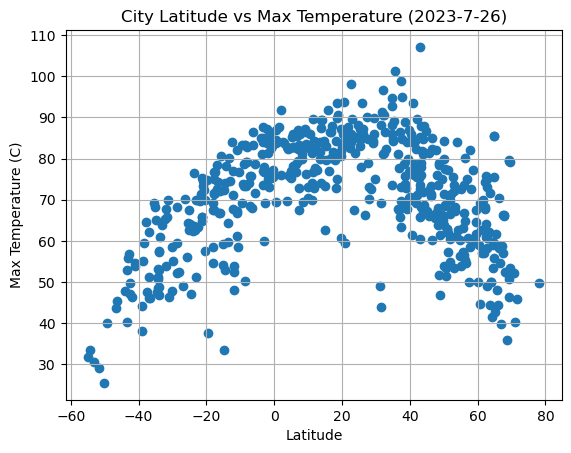

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature (2023-7-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

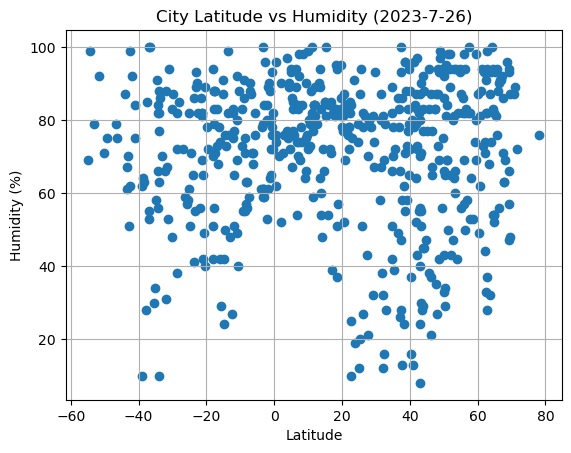

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity (2023-7-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

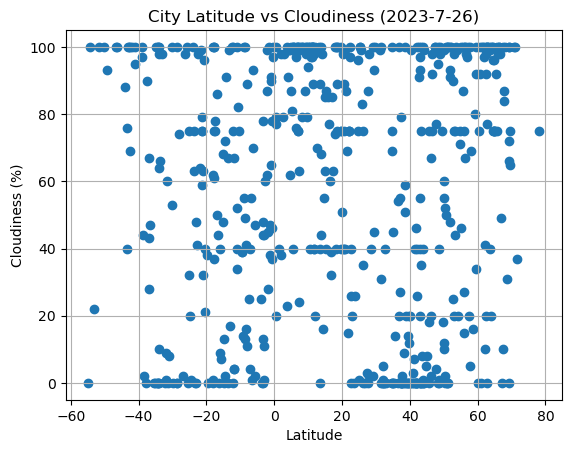

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (2023-7-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

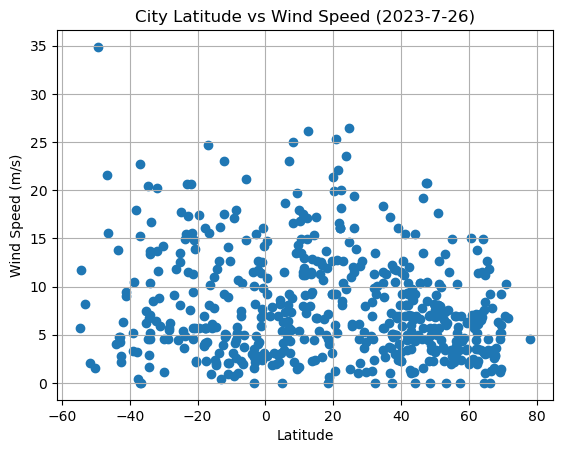

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed (2023-7-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    #Print r value
    print("The r-value is: " + str(rvalue))
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x, y)
    
    # Plot regression line
    plt.plot(x, regress_values, "r-")
    
    return line_eq
    

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mainvilliers,48.4500,1.4561,63.88,87,95,7.00,FR,1690425730
4,ilulissat,69.2167,-51.1000,46.42,66,0,4.61,GL,1690425730
6,udachny,66.4167,112.4000,70.45,56,100,9.26,RU,1690425730
7,isafjordur,66.0755,-23.1240,44.33,88,98,11.83,IS,1690425688
8,oban,56.4127,-5.4706,55.38,94,100,5.14,GB,1690425730


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,51.15,53,67,22.73,SH,1690425679
1,suva,-18.1416,178.4415,67.48,94,100,6.91,FJ,1690425730
2,port macquarie,-31.4333,152.9167,69.89,53,0,8.84,AU,1690425730
5,port-aux-francais,-49.3500,70.2167,40.14,75,93,34.87,TF,1690425677
9,adamstown,-25.0660,-130.1015,67.50,61,32,13.49,PN,1690425731


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6114408152077153


Text(0, 0.5, 'Max Temp')

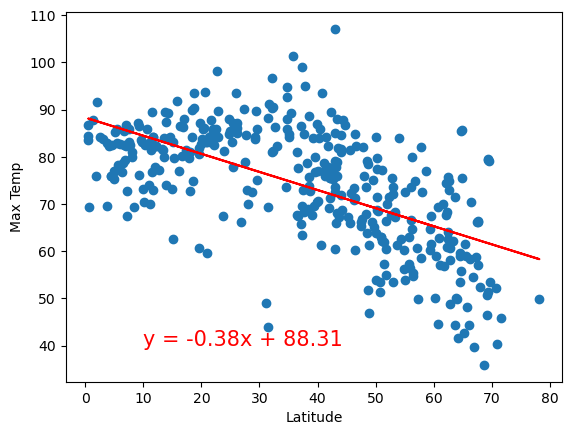

In [21]:
# Linear regression on Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.annotate(line_eq, (10,40), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: 0.7780892241700474


Text(0, 0.5, 'Max Temp')

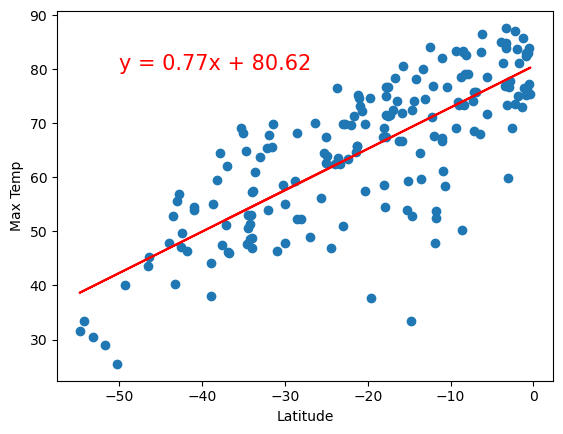

In [23]:
# Linear regression on Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.annotate(line_eq, (-50, 80), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** For the northern hemisphere, the linear equation shows a downward slope as the latitude increases. This means that the max temperatures overall decrease as the latitude increases away from 0. For the southern hemisphere, the linear equation shows an upward slope. This means that the max temperature increases as the latitude increases towards 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05985015339160347


Text(0, 0.5, 'Humidity')

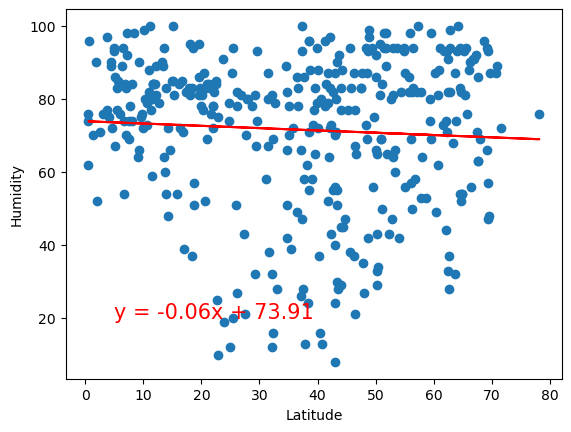

In [27]:
# Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.annotate(line_eq, (5, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: 0.05201975787693469


Text(0, 0.5, 'Humidity')

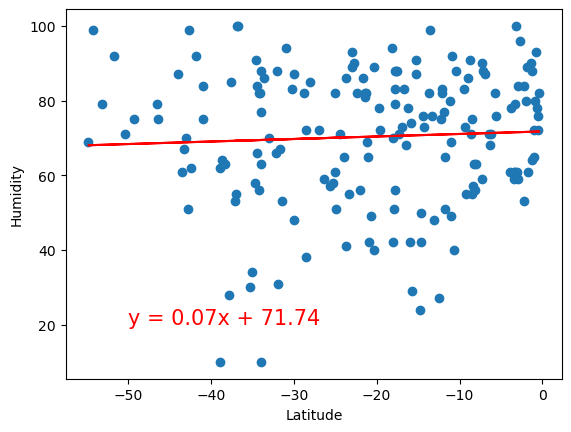

In [28]:
# Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** In the northern hemisphere, there is a negative slope. This means that the humidity decreases as the latitude increases from 0. In the southern hemisphere, there is a positive slope as the latitude increases towards 0. This means that the humidity increases as the latitude increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08890792794653173


Text(0, 0.5, 'Cloudiness')

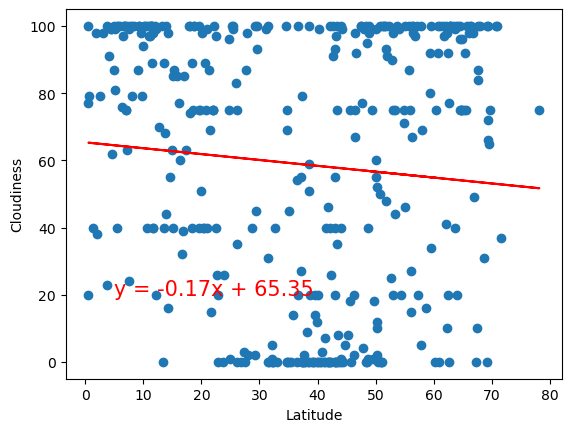

In [30]:
# Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.annotate(line_eq, (5, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: -0.12030609348791693


Text(0, 0.5, 'Cloudiness')

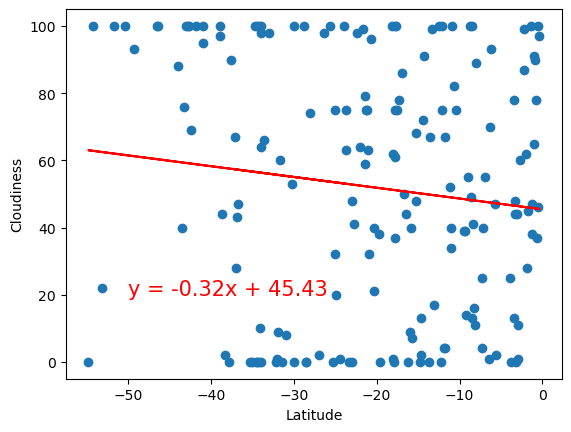

In [32]:
# Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

**Discussion about the linear relationship:** Both the northern and southern hemisphere show a negative slope. We can conclude that the cloudiness decreases as the latitude increases. Note that looking at only the scatter plot, it would be difficult to come to this conclusion.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.2849826103434199


Text(0, 0.5, 'Wind Speed')

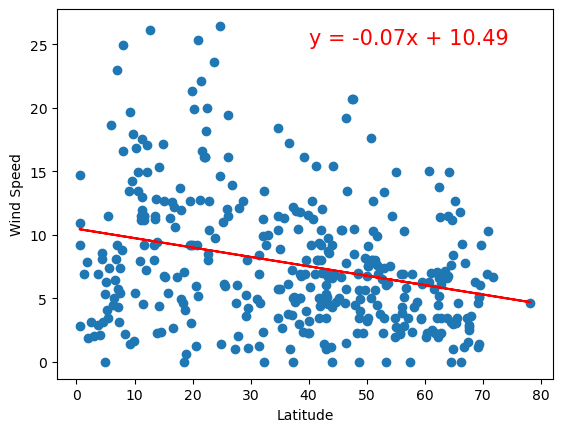

In [36]:
# Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.annotate(line_eq, (40, 25), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: -0.10522205011857406


Text(0, 0.5, 'Wind Speed')

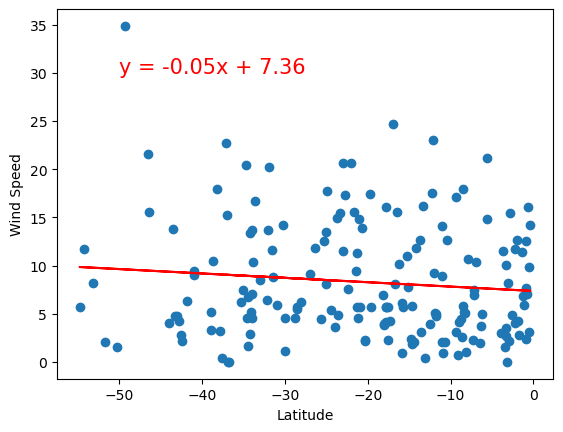

In [37]:
# Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.annotate(line_eq, (-50, 30), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** The northern hemisphere has higher wind speeds closer to 0, but the negative slope shows up that they tend to decrease as the latitude increases. In the southern hemisphere, we can note that the lower the latitude, the higher the wind speeds are. The negative slope shows us that the wind speeds decrease as the latitude increases to 0.